In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, entropy
from sklearn.metrics import roc_auc_score
from math import sqrt


# Analyse de données sur l'ensemble des bases de données 

# RIADD

In [23]:
import pandas as pd

df4 = pd.read_csv('RFMiD_Validation.csv')
df5 = pd.read_csv('RFMiD_Testing.csv')
df6 = pd.read_csv('RFMiD_Training.csv')

df = pd.concat([df4, df5, df6], ignore_index=True)
df_RIAD = df


occurrences = df.drop(columns='ID').sum()

representativity = (occurrences / len(df)) * 100

stats_df = pd.DataFrame({'Occurrences': occurrences, 'Representativity (%)': representativity})

print(stats_df)

print("\n nombre total des images :" , len(df))


   Occurrences  Representativity (%)
N          669              20.90625
D          632              19.75000
G          445              13.90625
C          523              16.34375
A          169               5.28125
H            9               0.28125
M          167               5.21875
O         1591              49.71875

 nombre total des images : 3200


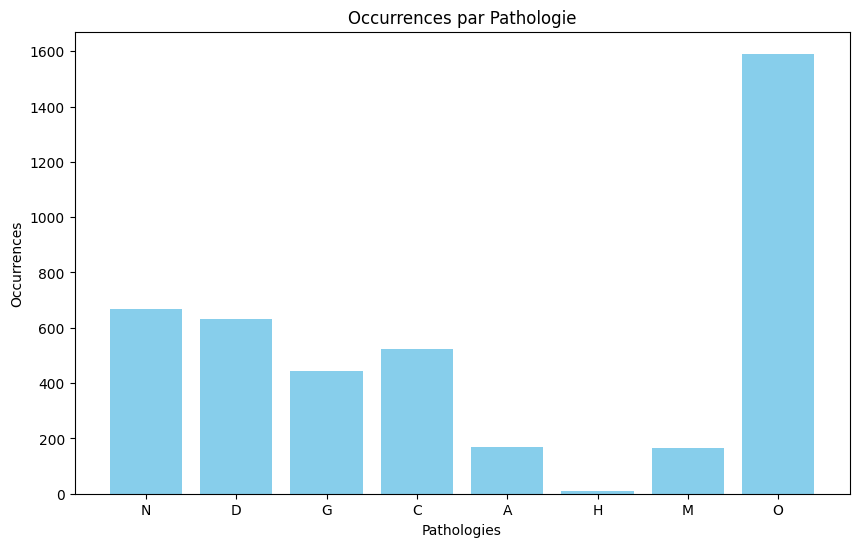

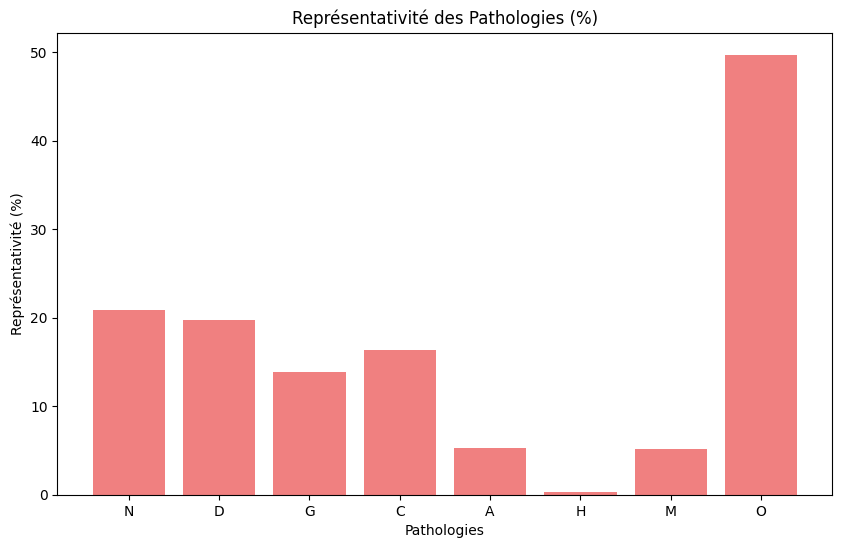

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Occurrences'], color='skyblue')
plt.xlabel('Pathologies')
plt.ylabel('Occurrences')
plt.title('Occurrences par Pathologie')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Representativity (%)'], color='lightcoral')
plt.xlabel('Pathologies')
plt.ylabel('Représentativité (%)')
plt.title('Représentativité des Pathologies (%)')
plt.show()

## Imbalance 


In [25]:
class_ratio = stats_df['Occurrences'].max() / stats_df['Occurrences'].min()
print(f"Ratio entre la classe la plus fréquente et la moins fréquente: {class_ratio}")

Ratio entre la classe la plus fréquente et la moins fréquente: 176.77777777777777


##  Une seule pathologie contre plusieurs pathologies 


In [26]:
single_pathology_images = df.drop(columns='ID').sum(axis=1).value_counts().get(1, 0)

multi_pathology_images = len(df) - single_pathology_images

print(f'Images avec une seule pathologie : {single_pathology_images}')
print(f'Images avec plusieurs pathologies : {multi_pathology_images}')

Images avec une seule pathologie : 2406
Images avec plusieurs pathologies : 794


## Matrice de corrélation 

In [27]:
correlation_matrix = df.drop(columns='ID').corr()
print(correlation_matrix)

          N         D         G         C         A         H         M  \
N  1.000000 -0.255052 -0.206627 -0.227245 -0.121400 -0.027304 -0.120639   
D -0.255052  1.000000 -0.036042 -0.140729 -0.117142 -0.026346 -0.095232   
G -0.206627 -0.036042  1.000000  0.010430 -0.038368 -0.004290  0.047823   
C -0.227245 -0.140729  0.010430  1.000000 -0.077920 -0.023474 -0.035317   
A -0.121400 -0.117142 -0.038368 -0.077920  1.000000 -0.012540  0.195884   
H -0.027304 -0.026346 -0.004290 -0.023474 -0.012540  1.000000 -0.012462   
M -0.120639 -0.095232  0.047823 -0.035317  0.195884 -0.012462  1.000000   
O -0.511239 -0.182461  0.404168 -0.164007 -0.041986 -0.005602 -0.095633   

          O  
N -0.511239  
D -0.182461  
G  0.404168  
C -0.164007  
A -0.041986  
H -0.005602  
M -0.095633  
O  1.000000  


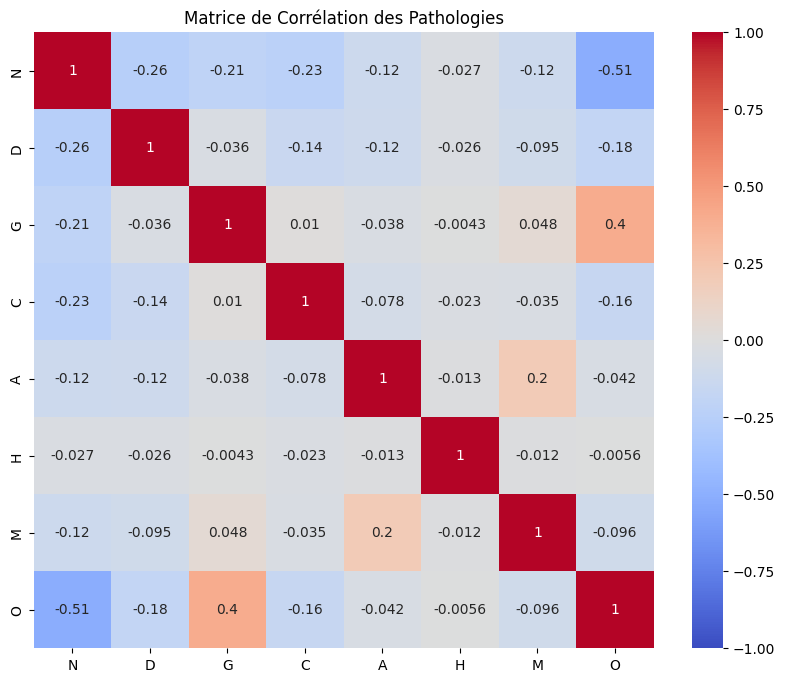

In [28]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Pathologies')
plt.show()

In [29]:
single_pathology_images = df.drop(columns='ID').sum(axis=1).value_counts().get(1, 0)

multi_pathology_images = len(df) - single_pathology_images

print(f'Images avec une seule pathologie : {single_pathology_images}')
print(f'Images avec plusieurs pathologies : {multi_pathology_images}')

Images avec une seule pathologie : 2406
Images avec plusieurs pathologies : 794


# ODIR :

# Statistiques sur la base de données :

In [30]:
import pandas as pd

df4 = pd.read_csv(r"C:\Users\PC\Desktop\base de données\ODIR\ODIR\classified_binary_per_eye_with_id_suffix.csv")
df5 = pd.read_csv(r"C:\Users\PC\Desktop\base de données\ODIR\ODIR\off-site test annotation_with_id_suffix.csv")

df = pd.concat([df4, df5], ignore_index=True)
df_ODIR = df


occurrences = df.drop(columns='ID').sum()

representativity = (occurrences / len(df)) * 100

stats_df = pd.DataFrame({'Occurrences': occurrences, 'Representativity (%)': representativity})

print(stats_df)

print("\n nombre total des images :" , len(df))

   Occurrences  Representativity (%)
N         3670               45.8750
D         1061               13.2625
G          371                4.6375
C          360                4.5000
A          316                3.9500
H          225                2.8125
M          300                3.7500
O         1895               23.6875

 nombre total des images : 8000


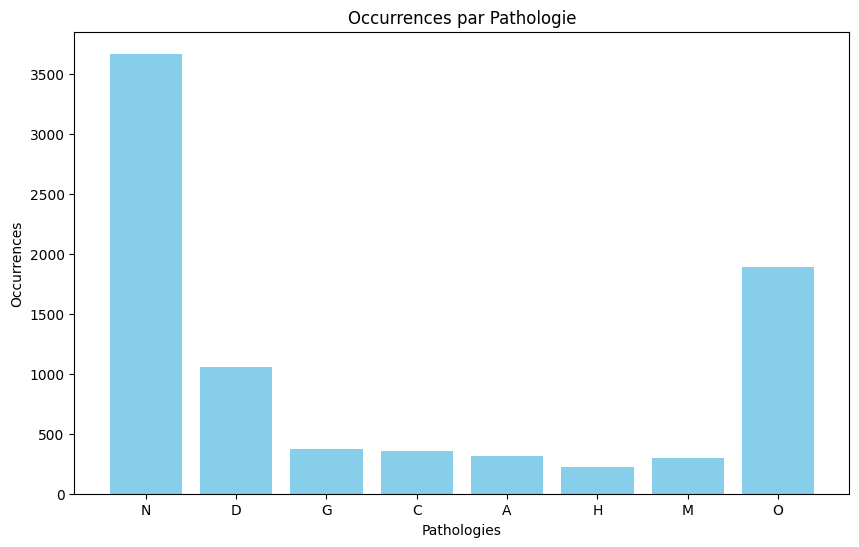

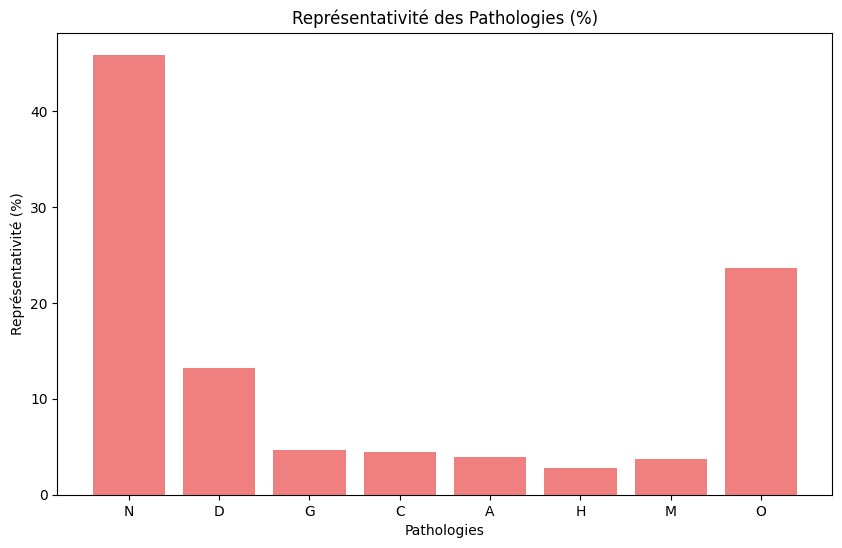

In [31]:

plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Occurrences'], color='skyblue')
plt.xlabel('Pathologies')
plt.ylabel('Occurrences')
plt.title('Occurrences par Pathologie')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Representativity (%)'], color='lightcoral')
plt.xlabel('Pathologies')
plt.ylabel('Représentativité (%)')
plt.title('Représentativité des Pathologies (%)')
plt.show()

## Imbalance 

In [32]:
class_ratio = stats_df['Occurrences'].max() / stats_df['Occurrences'].min()
print(f"Ratio entre la classe la plus fréquente et la moins fréquente: {class_ratio}")

Ratio entre la classe la plus fréquente et la moins fréquente: 16.31111111111111


In [33]:
single_pathology_images = df.drop(columns='ID').sum(axis=1).value_counts().get(1, 0)

multi_pathology_images = len(df) - single_pathology_images

print(f'Images avec une seule pathologie : {single_pathology_images}')
print(f'Images avec plusieurs pathologies : {multi_pathology_images}')

Images avec une seule pathologie : 7802
Images avec plusieurs pathologies : 198


## Matrice de corrélation 

In [34]:
correlation_matrix = df.drop(columns='ID').corr()
print(correlation_matrix)

          N         D         G         C         A         H         M  \
N  1.000000 -0.353340 -0.181550 -0.167173 -0.186698 -0.156614 -0.173798   
D -0.353340  1.000000 -0.052933 -0.075993 -0.045239  0.033793 -0.073304   
G -0.181550 -0.052933  1.000000 -0.042135  0.007158  0.009224 -0.018498   
C -0.167173 -0.075993 -0.042135  1.000000 -0.044020 -0.025986 -0.042847   
A -0.186698 -0.045239  0.007158 -0.044020  1.000000 -0.018971 -0.033272   
H -0.156614  0.033793  0.009224 -0.025986 -0.018971  1.000000 -0.033578   
M -0.173798 -0.073304 -0.018498 -0.042847 -0.033272 -0.033578  1.000000   
O -0.512921 -0.217857 -0.122861 -0.120939 -0.112983 -0.094777 -0.109971   

          O  
N -0.512921  
D -0.217857  
G -0.122861  
C -0.120939  
A -0.112983  
H -0.094777  
M -0.109971  
O  1.000000  


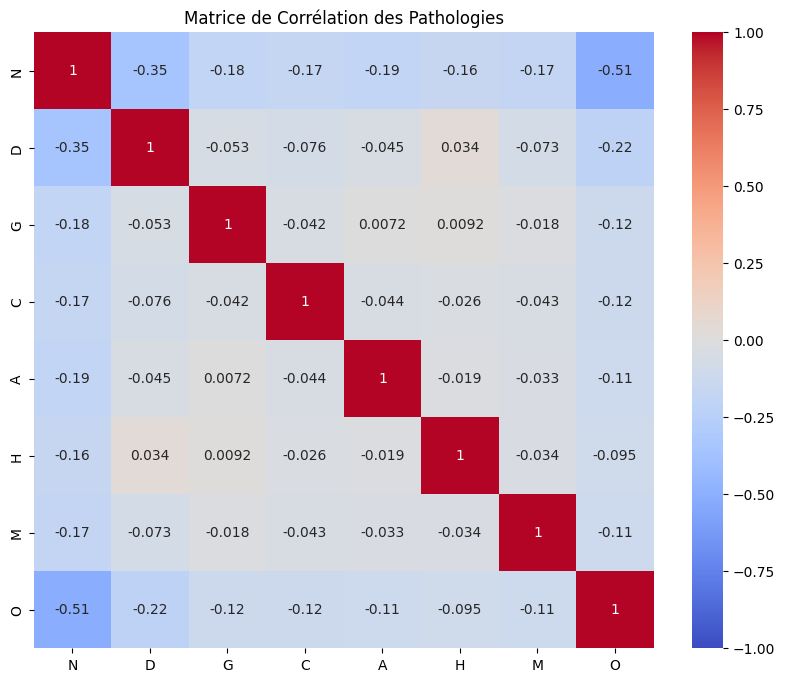

In [35]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Pathologies')
plt.show()

# Kaggle DR+

## Statistiques 

In [37]:
import pandas as pd

df = pd.read_csv('annotations_consolidated_unified.csv')
occurrences = df.drop(columns='ID').sum()
df_KAGGLE = df

representativity = (occurrences / len(df)) * 100

stats_df = pd.DataFrame({'Occurrences': occurrences, 'Representativity (%)': representativity})

print(stats_df)

print("\n nombre total des images :" , len(df))

   Occurrences  Representativity (%)
N        23721             41.941016
D         8160             14.427667
G         5256              9.293115
C            0              0.000000
A        13130             23.215107
H        19041             33.666325
M        25539             45.155416
O         1831              3.237385

 nombre total des images : 56558


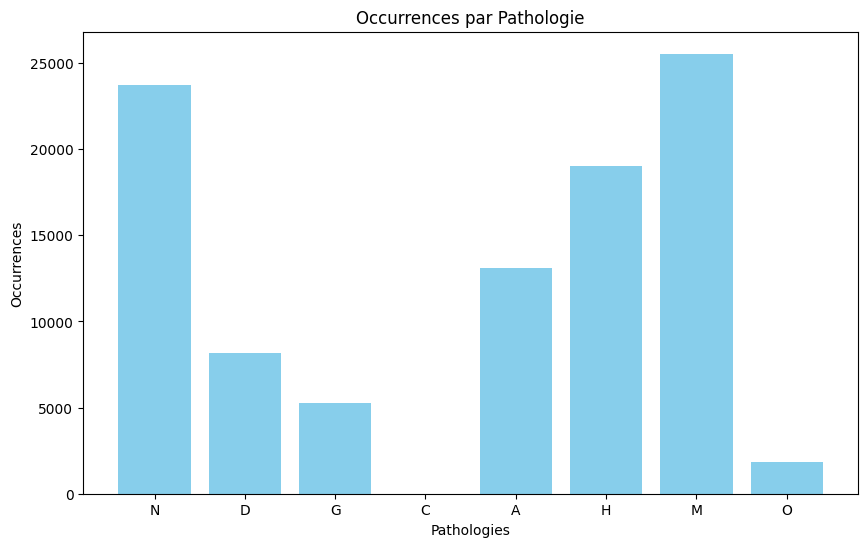

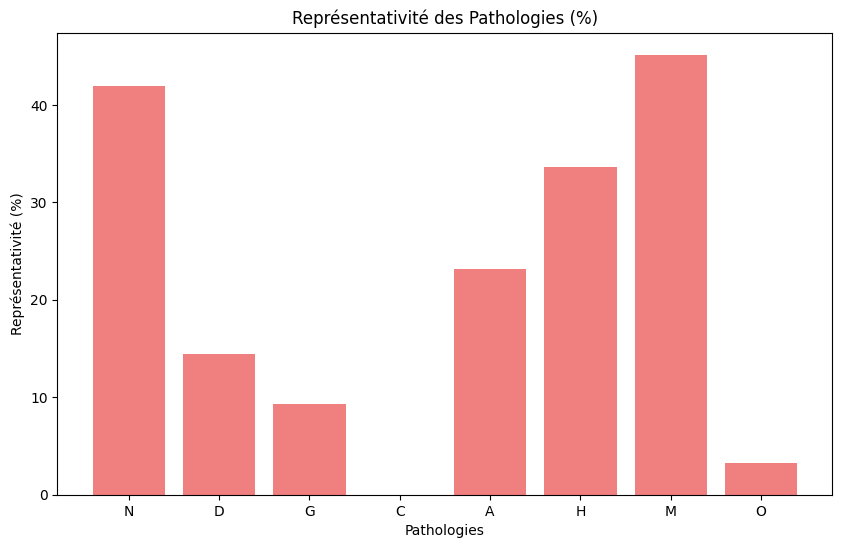

In [38]:

plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Occurrences'], color='skyblue')
plt.xlabel('Pathologies')
plt.ylabel('Occurrences')
plt.title('Occurrences par Pathologie')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(stats_df.index, stats_df['Representativity (%)'], color='lightcoral')
plt.xlabel('Pathologies')
plt.ylabel('Représentativité (%)')
plt.title('Représentativité des Pathologies (%)')
plt.show()

## Imbalance

### on néglige ici la classe 'CATARACT '

In [39]:
class_ratio = stats_df['Occurrences'].max() / stats_df['Occurrences'][7]
print(f"Ratio entre la classe la plus fréquente et la moins fréquente: {class_ratio}")

Ratio entre la classe la plus fréquente et la moins fréquente: 13.94811578372474


C:\Users\PC\AppData\Local\Temp\ipykernel_13220\3883790600.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_ratio = stats_df['Occurrences'].max() / stats_df['Occurrences'][7]


# Comparaison des deux base de données :

## Comparaison en fonction de la taille des classes 

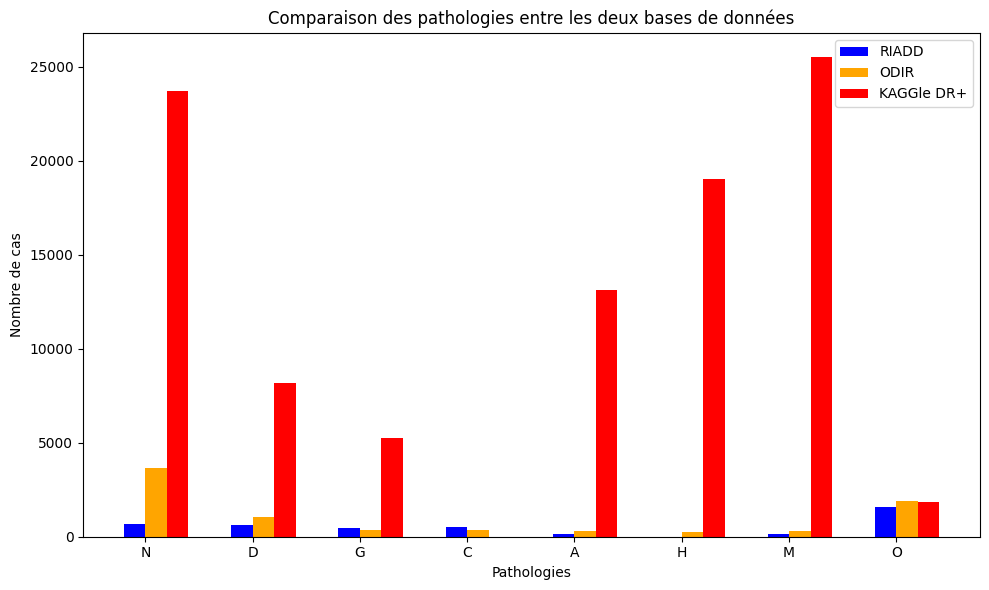

In [45]:
pathologies = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']


def plot_combined_histogram(df1, df2 , df3):
    df1_counts = [df1[pathology].sum() for pathology in pathologies]
    df2_counts = [df2[pathology].sum() for pathology in pathologies]
    df3_counts = [df3[pathology].sum() for pathology in pathologies]

    
    bar_width = 0.2
    index = np.arange(len(pathologies))
    
    plt.figure(figsize=(10, 6))
    plt.bar(index, df1_counts, bar_width, color='blue', label='RIADD')
    plt.bar(index + bar_width, df2_counts, bar_width, color='orange', label='ODIR')
    plt.bar(index + bar_width+bar_width , df3_counts, bar_width, color='red', label='KAGGle DR+')

    
    plt.xlabel('Pathologies')
    plt.ylabel('Nombre de cas')
    plt.title('Comparaison des pathologies entre les deux bases de données')
    plt.xticks(index + bar_width / 2, pathologies)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_combined_histogram(df_RIAD, df_ODIR , df_KAGGLE)

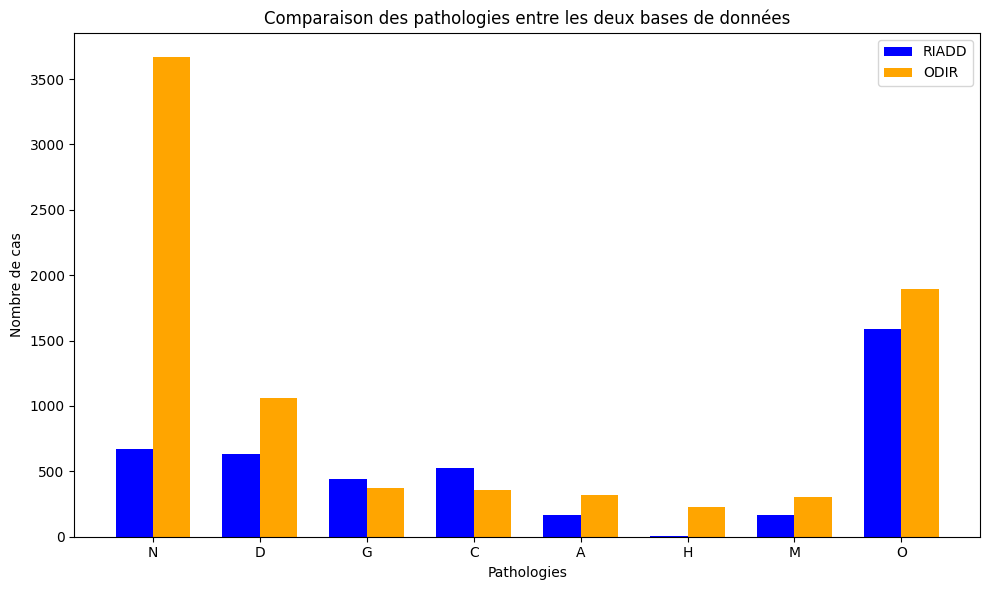

In [46]:
pathologies = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']


def plot_combined_histogram(df1, df2):
    df1_counts = [df1[pathology].sum() for pathology in pathologies]
    df2_counts = [df2[pathology].sum() for pathology in pathologies]
    
    bar_width = 0.35
    index = np.arange(len(pathologies))
    
    plt.figure(figsize=(10, 6))
    plt.bar(index, df1_counts, bar_width, color='blue', label='RIADD')
    plt.bar(index + bar_width, df2_counts, bar_width, color='orange', label='ODIR')
    
    plt.xlabel('Pathologies')
    plt.ylabel('Nombre de cas')
    plt.title('Comparaison des pathologies entre les deux bases de données')
    plt.xticks(index + bar_width / 2, pathologies)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_combined_histogram(df_RIAD, df_ODIR)

## Test khi-2

In [34]:
def chi_square_test(df1, df2):
    chi2_results = {}
    for pathology in pathologies:
        contingency_table = np.array([[df1[pathology].sum(), df2[pathology].sum()],
                                      [len(df1) - df1[pathology].sum(), len(df2) - df2[pathology].sum()]])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[pathology] = (chi2, p)
    
    return chi2_results

chi2_results = chi_square_test(df1, df2)


print("Résultats du test du chi-carré pour chaque pathologie :")
for pathology, (chi2, p) in chi2_results.items():
    print(f"{pathology}: Chi2 = {chi2:.4f}, p-value = {p:.4f}")

Résultats du test du chi-carré pour chaque pathologie :
N: Chi2 = 586.9619, p-value = 0.0000
D: Chi2 = 122.8135, p-value = 0.0000
G: Chi2 = 267.5390, p-value = 0.0000
C: Chi2 = 409.8118, p-value = 0.0000
A: Chi2 = 8.8943, p-value = 0.0029
H: Chi2 = 70.8603, p-value = 0.0000
M: Chi2 = 11.7632, p-value = 0.0006
O: Chi2 = 599.3610, p-value = 0.0000


<div style="font-family: Arial, sans-serif; font-size: 14px;">
    <p>
        <strong>Pour toutes les pathologies, les p-values sont extrêmement faibles (inférieures à 0.05),</strong> 
        ce qui signifie qu'il existe des <strong>différences significatives</strong> entre les deux bases de données pour toutes les pathologies.
    </p>
    <p>
        Les valeurs de <strong>Chi2</strong> varient selon les pathologies, mais elles sont globalement élevées, indiquant que ces 
        <strong>différences sont importantes</strong>, surtout pour les pathologies comme <strong>Normal (N)</strong>, 
        <strong>Other (O)</strong>, <strong>Cataract (C)</strong>, et <strong>Glaucoma (G)</strong>.
    </p>
</div>


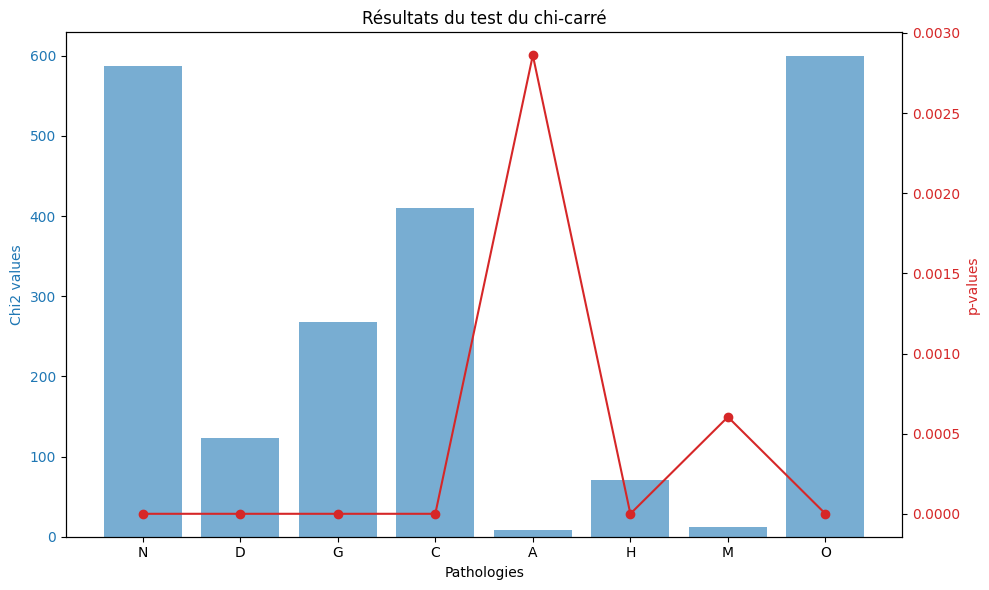

In [37]:
def plot_chi_square_results(chi2_results):
    pathologies = list(chi2_results.keys())
    chi2_values = [chi2_results[pathology][0] for pathology in pathologies]
    p_values = [chi2_results[pathology][1] for pathology in pathologies]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Pathologies')
    ax1.set_ylabel('Chi2 values', color='tab:blue')
    ax1.bar(pathologies, chi2_values, color='tab:blue', alpha=0.6, label='Chi2 values')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('p-values', color='tab:red')
    ax2.plot(pathologies, p_values, color='tab:red', marker='o', label='p-values')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Résultats du test du chi-carré')
    fig.tight_layout()
    plt.show()

plot_chi_square_results(chi2_results)

## Calcul du z-score 

In [40]:
def proportions_test(df1, df2):
    prop_results = {}
    for pathology in pathologies:
        prop1 = df1[pathology].mean()
        prop2 = df2[pathology].mean()
        n1 = len(df1)
        n2 = len(df2)
        
        prop_diff = prop1 - prop2
        pooled_prop = (prop1 * n1 + prop2 * n2) / (n1 + n2)
        standard_error = sqrt(pooled_prop * (1 - pooled_prop) * (1/n1 + 1/n2))
        z = prop_diff / standard_error
        
        prop_results[pathology] = z
    
    return prop_results

print("Résultats du test des proportions (z-scores) pour chaque pathologie :")
for pathology, z in prop_test_results.items():
    print(f"{pathology}: z-score = {z:.4f}")


Résultats du test des proportions (z-scores) pour chaque pathologie :
N: z-score = -24.2493
D: z-score = 11.1128
G: z-score = 16.3970
C: z-score = 20.2827
A: z-score = 3.0345
H: z-score = -8.4933
M: z-score = 3.4830
O: z-score = 24.5046


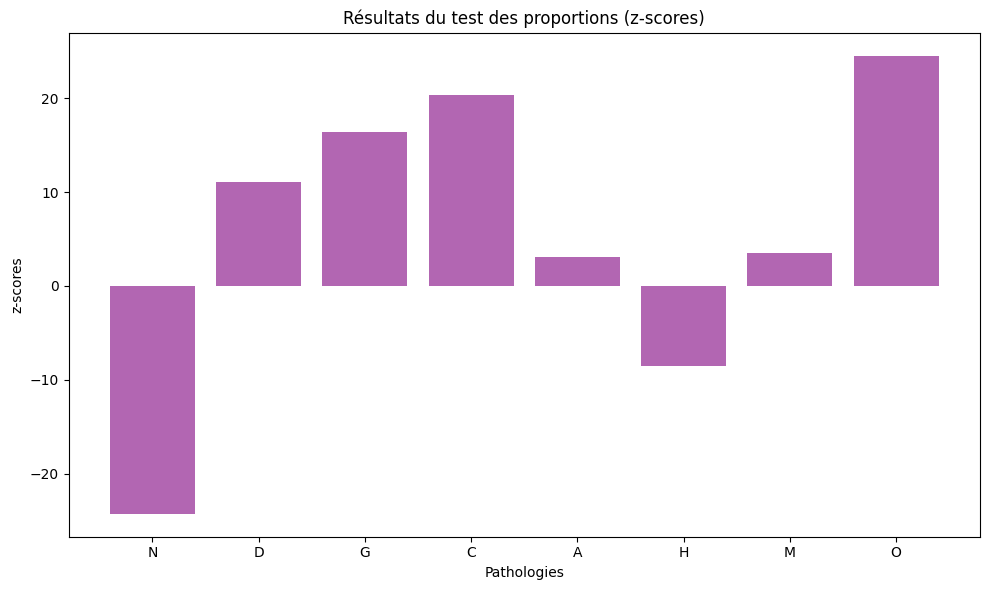

In [41]:
def plot_proportions_results(prop_test_results):
    pathologies = list(prop_test_results.keys())
    z_scores = [prop_test_results[pathology] for pathology in pathologies]
    
    plt.figure(figsize=(10, 6))
    plt.bar(pathologies, z_scores, color='purple', alpha=0.6)
    plt.xlabel('Pathologies')
    plt.ylabel('z-scores')
    plt.title('Résultats du test des proportions (z-scores)')
    plt.tight_layout()
    plt.show()

plot_proportions_results(prop_test_results)

In [42]:
def hellinger_distance(df1, df2):
    hellinger_results = {}
    for pathology in pathologies:
        p = np.sqrt((df1[pathology].value_counts(normalize=True) + 1e-6).values)
        q = np.sqrt((df2[pathology].value_counts(normalize=True) + 1e-6).values)
        hellinger_results[pathology] = np.sqrt(np.sum((p - q) ** 2)) / sqrt(2)
    
    return hellinger_results

hellinger_results = hellinger_distance(df1, df2)

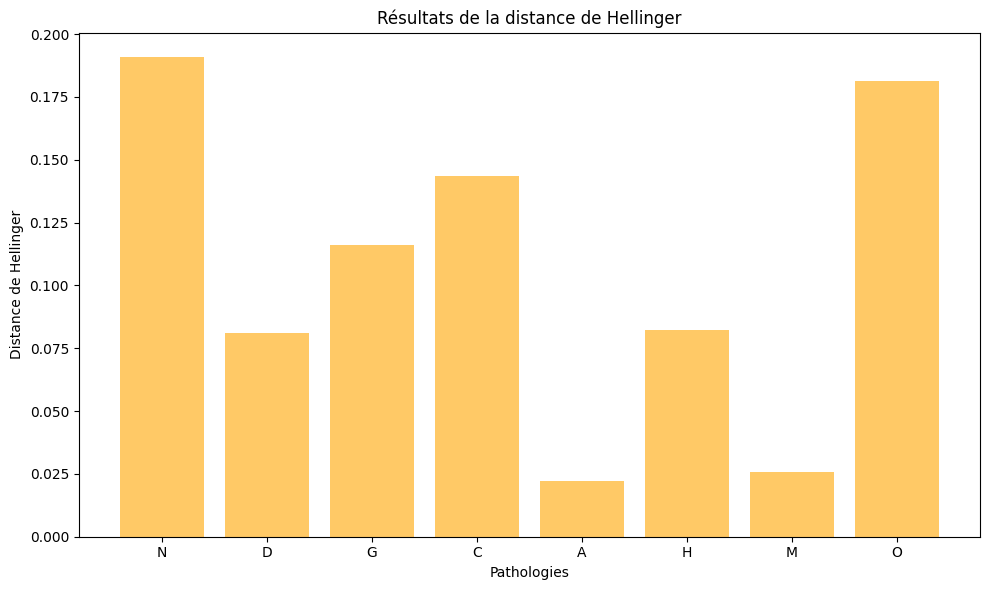

In [43]:
def plot_hellinger_results(hellinger_results):
    pathologies = list(hellinger_results.keys())
    hellinger_values = [hellinger_results[pathology] for pathology in pathologies]
    
    plt.figure(figsize=(10, 6))
    plt.bar(pathologies, hellinger_values, color='orange', alpha=0.6)
    plt.xlabel('Pathologies')
    plt.ylabel('Distance de Hellinger')
    plt.title('Résultats de la distance de Hellinger')
    plt.tight_layout()
    plt.show()

plot_hellinger_results(hellinger_results)